In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc
import pdb
from skimage.io import imsave
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import glob
import os


# this part save the rails images (left and right in blue and red respectively)
# focalfor video 0: 1801.5909135560134
video_focals = []
s = 1

for file in glob.glob("/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/detect_rails/*.jpg"):
    frame = cv2.imread(file)
    s += 1
    # detect the green color (green rails) and show only the rails
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)

    
    lower_green = np.array([0, 50, 0])
    upper_green = np.array([0, 255, 0])


    mask = cv2.inRange(frame, lower_green, upper_green)
    res = cv2.bitwise_and(frame, frame, mask=mask)


    #changed the mask into rgb image
    im = Image.fromarray(res, 'RGB')
    
    # create right rail array

    right_rail = np.zeros([1080, 2])
    right = 0

    for y in range(frame.shape[0]): #1080
        for x in range(frame.shape[1]): #1080
            width = x
            hight =  y
            r, g, b = im.getpixel((width, hight))
            if g != 0 and width > 977:
                right_rail[right] = width ,hight 
                right += 1
                break
                
    # squeeze zeros 
    right_rail = right_rail[~np.all(right_rail == 0, axis=1)]


    # take two at random and link them 
    right_rail_up = right_rail[40:45]
    right_rail_down = right_rail[right_rail.shape[0]-10:]

    d = ImageDraw.Draw(im)
    d1 = ImageDraw.Draw(im_pil)
    
    bottom = ( right_rail_down[np.argmin(right_rail_down[:,0])][0]-4  ,right_rail_down[np.argmin(right_rail_down[:,0])][1])
    top = (right_rail_up[np.argmin(right_rail_up[:,0])][0]  ,right_rail_up[np.argmin(right_rail_up[:,0])][1])
    
    line_color = (255, 0, 0)
    
    d.line([bottom, top], fill=line_color, width=1)
    d1.line([bottom, top], fill=line_color, width=1)

    
    im1 = np.array(im)
    im2 = np.array(im_pil)
    
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/left_right_rails/'+ base_name,im1)
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/draw/'+ base_name,im2)

        # create left rail 
    left_rail = np.zeros([1080, 2])

    for y in range(frame.shape[0]): #1080
        for x in range(frame.shape[1]): #1080
            width = x
            hight =  y
            r, g, b = im.getpixel((width, hight))
            if g != 0 and width < 950:
                left_rail[y] = width ,hight             

    # squeeze zeros    
    left_rail = left_rail[~np.all(left_rail == 0, axis=1)]

        # take two at random and link them 
    left_rail_up = left_rail[50:60] 
    # if statement to add more points
    left_rail_down = left_rail[left_rail.shape[0]-10:]

    d = ImageDraw.Draw(im)
    d1 = ImageDraw.Draw(im_pil)
    
    top = ( left_rail_down[np.argmax(left_rail_down[:,0])][0]+10  ,left_rail_down[np.argmax(left_rail_down[:,0])][1])
    left = (left_rail_up[np.argmax(left_rail_up[:,0])][0]  ,left_rail_up[np.argmax(left_rail_up[:,0])][1])

    line_color = (0, 0, 255)
    
    d.line([top, left], fill=line_color, width=1)
    d1.line([top, left], fill=line_color, width=1)

    im1 = np.array(im)
    im2 = np.array(im_pil)

    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/left_right_rails/'+ base_name,im1)
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/draw/'+ base_name,im2)

    
    print('/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/left_right_rails/'+ base_name)
    

/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/left_right_rails/100
/home-local/video_data/NoInsidesorStopvideos/0/image_03/groundtruth/left_right_rails/102


KeyboardInterrupt: 

In [5]:
##########################################################################
######################################################################
#######################################################################
################## code to compute depth ###############################

import numpy as np
import PIL
import math
from PIL import Image
from matplotlib import pyplot
from matplotlib import cm
import matplotlib
from imageio import imread
# imread("test_images/pick.jpg")
import pysnooper
import pdb
import numpy as np
import PIL
import math
from PIL import Image
from matplotlib import pyplot
from matplotlib import cm
import matplotlib
from imageio import imread

RAIL_GAUGE_STANDARD = 1435
DELTA_Z = 609.6

def compute_distance(depthcood):

    dist = np.zeros(int(depthcood.shape[0]/2))
    s = 0

    for i in range(0, depthcood.shape[0], 2):

        dx = (depthcood[i][0] - depthcood[i+1][0]) ** 2
        dy = (depthcood[i][1] - depthcood[i+1][1]) ** 2
        distance = math.sqrt(dx + dy)
        dist[s] = distance

        s = s + 1
    return dist
def compute_distance_two_txt(txt1, txt2):

    dist = np.zeros(int(txt1.shape[0]))
    s = 0

    for i in range(0, txt1.shape[0]):
        dx = (txt1[i][0] - txt2[i][0]) ** 2
        dy = (txt1[i][1] - txt2[i][1]) ** 2
        distance = math.sqrt(dx + dy)
        dist[s] = distance

        s = s + 1
    return dist

def compute_depth(depthcood, f):
    z = np.zeros(int(depthcood.shape[0] / 2))

    s = 0
    for i in range(0, depthcood.shape[0], 2):

        dx = (depthcood[i][0] - depthcood[i + 1][0]) ** 2
        dy = (depthcood[i + 1][1] - depthcood[i + 1][1]) ** 2
        distance = math.sqrt(dx + dy)
        z[s] = f * RAIL_GAUGE_STANDARD / distance
        s = s + 1
    return z

def compute_depth_two_txt(dist, f):
    z = np.zeros(int(dist.shape[0]))
    print(dist.shape[0])
    s = 0
    for i in range(dist.shape[0]):
        z[s] = f * RAIL_GAUGE_STANDARD / dist[i]
        s = s + 1
    return z


def fill_depth_map(depthcood, img, a):
    s = 0
    for i in range(0, depthcood.shape[0], 2):
        img[int(depthcood[i][1]), int(depthcood[i][0]):int(depthcood[i+1][0])] = a[s]
        s += 1

def fill_depth_map_two_txt(txt1, txt2, img, a):
    for i in range(txt1.shape[0]):
        l = int(txt1[i][1])
        f = int(txt1[i][0])
        t = int(txt2[i][0])
        img[l, f:t] = a[i]
       
    
def compute_focal_2(distance):

    '''Compute camera focal from two diffrent values'''

    x = (RAIL_GAUGE_STANDARD/ distance[0]) - (RAIL_GAUGE_STANDARD/ distance[1])
    f = -DELTA_Z/(x)
    return f


@pysnooper.snoop()

def compute_focal_n(distance):

    '''Compute camera focal from multiple values'''

    tr = np.zeros(int(depthcood.shape[0] / 2))
    s = 0
    for i in range(1,len(tr)):
        tr[i] = 1/distance[i]
        s = s + 1/distance[i]


    n = len(distance)
    a = -DELTA_Z/RAIL_GAUGE_STANDARD
    b = n*(n-1)/2
    c = 1/((n-1)/distance[0]-s)
    f = a*b*c
    return f



/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/205.png        1
328
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/205


/opt/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/38.png        2
352
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/38
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/39.png        3
336
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/39
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/40.png        4
270
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/40
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/202.png        5
325
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/202
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/207.png        6
329
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/207
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/43.png        7
364
/home-local/datasetvideo/0/frames_with_depth_map/left_right_

/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/105.png        50
370
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/105
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/106.png        51
370
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/106
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/107.png        52
370
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/107
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/108.png        53
366
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/108
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/115.png        54
353
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/115
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/116.png        55
354
/home-local/datasetvideo/0/frames_with_depth_ma

/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/10.png        98
329
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/10
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/11.png        99
328
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/11
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/12.png        100
335
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/12
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/13.png        101
336
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/13
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/14.png        102
331
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/14
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/15.png        103
328
/home-local/datasetvideo/0/frames_with_depth_map/left_

368
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/231
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/232.png        146
373
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/232
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/233.png        147
360
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/233
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/234.png        148
345
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/234
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/235.png        149
399
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/235
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/236.png        150
316
/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/236
/home-local/datasetvideo/0/frames_with_de

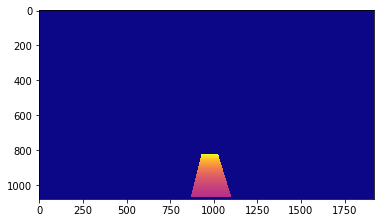

In [6]:
import glob
import cv2
import numpy as np
import PIL
import math
from matplotlib import cm
from imageio import imread
import pysnooper
import os
import matplotlib.pyplot as plt
import scipy.misc
import pdb
from skimage.io import imsave
from PIL import Image, ImageDraw
import numpy as np
from imageio import imread
import glob
import skimage.transform

import os
n = 0
video_focals = np.array([1801.5909135560134, 1173.995655488004, 1405.680431915585, 2444.7489844113907, 1442.9957867466278, 1236.3128201089055, 2094.9021200603393, 2106.4200881871634])

for file in glob.glob("/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/*.png"):
    n += 1
    im = cv2.imread(file)
    print(file,'      ', n)

    blue_line = np.zeros([1000, 2])

    color = (0, 0, 255)
    im = Image.fromarray(im, 'RGB')
    i = 0
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            r, g, b = im.getpixel((x, y))
            if (r, g, b) == color:
                blue_line[i] = [x, y]
                i = i + 1
    blue_line = blue_line[~np.all(blue_line == 0, axis=1)]
    
    red_line = np.zeros([1000, 2])
    color = (255, 0, 0)

    j = 0
    for x in range(im.size[0]-1,0, -1):
        for y in range(im.size[1]):

            r, g, b = im.getpixel((x, y))
            if (r, g, b) == color:
                red_line[j] = [x, y]
                j = j + 1
    red_line = red_line[~np.all(red_line == 0, axis=1)]
    
    itemindex = 0
    if red_line[:100,1][0] > blue_line[:100,1][0]:
        for i in range(red_line[:100,1].shape[0]):
            itemindex = np.where(blue_line[:100,1]==red_line[:100,1][i])
            if itemindex !=0:
                break
        blue_line = blue_line[15:]
    else:
        for i in range(blue_line[:100,1].shape[0]):
            itemindex = np.where(red_line[:100,1]==blue_line[:100,1][i])
            if itemindex !=0:
                break
                
                
    if red_line.shape[0] > blue_line.shape[0]:
        red_line = red_line[:blue_line.shape[0],:]
    else:
        blue_line = blue_line[:red_line.shape[0],:]
        
    a = red_line
    b = blue_line

    red_blue = np.empty((red_line.shape[0] + blue_line.shape[0], red_line.shape[1]), dtype=red_line.dtype)
    red_blue[0::2] = red_line
    red_blue[1::2] = blue_line

    # put them in a txt file 
    np.savetxt('test.txt', red_blue, delimiter=' ')
    np.savetxt('right_test.txt', red_line, delimiter=' ')
    np.savetxt('left_test.txt', blue_line, delimiter=' ')
    
    txt1 = np.loadtxt('left_test.txt')
    txt2 = np.loadtxt('right_test.txt')

    depthcood = np.loadtxt('test.txt')

    
    dist = compute_distance(depthcood) # distance bin el point limin wel issar 
    distance = compute_distance_two_txt(txt1, txt2)

    z = compute_depth_two_txt(dist, video_focals[0])

    minima = min(z)
    maxima = max(z)

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)

    #fill depth map
    im1 = np.zeros([1080, 1920])
    # fill_depth_map_two_txt(txt1, txt2, im1, z)
    fill_depth_map(depthcood, im1, z)
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    print('/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/'+ base_name)
    np.save('/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/npy/'+ base_name, im1)

    disp_to_img = skimage.transform.resize(im1.squeeze(), [1080, 1920], mode='constant')
    
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=disp_to_img.min(), vmax=disp_to_img.max())

    # map the normalized data to colors
    # image is now RGBA (512x512x4) 
    image = cmap(norm(disp_to_img))
    # mean of all images and max of all images
    plt.imshow(disp_to_img, cmap='plasma')
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/datasetvideo/0/frames_with_depth_map/left_right_rails/depth_maps/'+ base_name,image)
    # change to min and max of all the dataset
    

